In [1]:
import numpy as np

# Frobenius Norm

• Analogus to L2 form of Vectors      
• Measures the size of the matrix in terms of Euclidean Distance     
• It's the sum of magnitude of all the vectors in X  

In [2]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [3]:
np.linalg.norm(A)

5.477225575051661

In [4]:
U = np.array([[2,5,-3]])
U

array([[ 2,  5, -3]])

### The Frobenius Norm value is 5.478

# Affine Transformation

### Transformations such as: 
1. Rotation
2. Scaling
3. Shearing

In [5]:
v = np.array([3, 1])
v

array([3, 1])

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

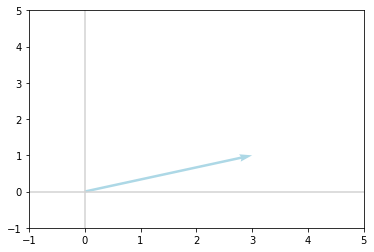

In [8]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [9]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [10]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

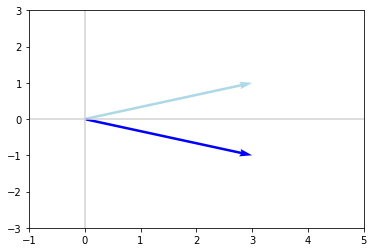

In [11]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

# Eigenvectors and EigenValues

In [12]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [13]:
lambdas, V = np.linalg.eig(A) 

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the QR algorithm, which was independently developed in the 1950s by both Vera Kublanovskaya and John Francis), however this is outside scope of the ML Foundations series. We'll cheat with NumPy eig() method, which returns a tuple of:

•a vector of eigenvalues    
•a matrix of eigenvectors

In [14]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [15]:
lambdas # corresponding eigenvalue for each eigenvector

array([ 1.37228132, -4.37228132])

In [16]:
v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [17]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [18]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [19]:
lambduh * v

array([1.18031462, 0.70000958])

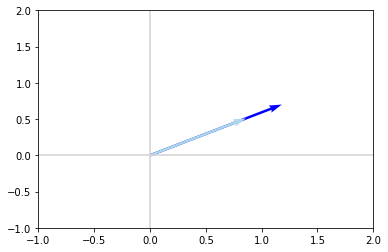

In [20]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)


Now, for the second eigenvector of A:

In [21]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [22]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [23]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [24]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

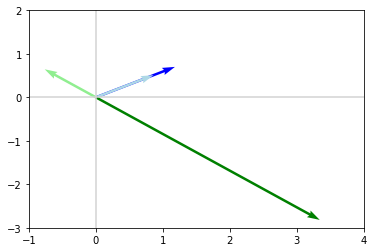

In [25]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

# Eigendecomposition

In [26]:
A = np.array([[1, 3], [4, 5]]) 
A

array([[1, 3],
       [4, 5]])

In [27]:
lambdas, V = np.linalg.eig(A)

In [28]:
V

array([[-0.83205029, -0.4472136 ],
       [ 0.5547002 , -0.89442719]])

In [29]:
Vinv = np.linalg.inv(V)
Vinv

array([[-0.90138782,  0.45069391],
       [-0.55901699, -0.83852549]])

In [30]:
lambdas # Eigenvalues

array([-1.,  7.])

In [31]:
Lambda = np.diag(lambdas)
Lambda

array([[-1.,  0.],
       [ 0.,  7.]])

In [32]:
np.dot(V, np.dot(Lambda, Vinv))

array([[1., 3.],
       [4., 5.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers.

# Singular Value Decomposition

In [33]:
A = np.array([[1,2],[2,1]])
A

array([[1, 2],
       [2, 1]])

In [34]:
U, d, VT = np.linalg.svd(A)

In [35]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [36]:
d

array([3., 1.])

### The singular value is (3,1)

In [37]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])